# EXPLORATORY DATA ANALYSIS 

STEP 0: LIBRARIES AND DATA IMPORT

In [46]:
# LIBRARIES
import pandas as pd
import sqlite3 as sq
import seaborn as sns
import matplotlib.pyplot as plt

# URL
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

total_data = pd.read_csv(URL)
total_data.to_csv('total_data_raw.csv')

STEP 1: DESCRIPTIVE DATA ANALYSIS (DDA)

In [56]:
# general info and shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
# General description and data values 
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Duplicates
total_data.duplicated().sum()

0

Conclusiones: 

- 768 entradas y 9 columnas (8 + target)

- NO hay valores nulos

- NO hay valores repetidos

Explicación de las columnas (inglés):

1. Pregnancies. Number of pregnancies of the patient (numeric)
2. Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
3. BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
4. SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
5. Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
6. BMI. Body mass index (numeric)
7. DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
8. Age. Age of patient (numeric)
9. Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [5]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


PASO 2: ANÁLISIS UNIVARIANTE

No existen variables categóricas de texto (excepto la predictora, todas son numéricas)

(-0.1, 1.1)

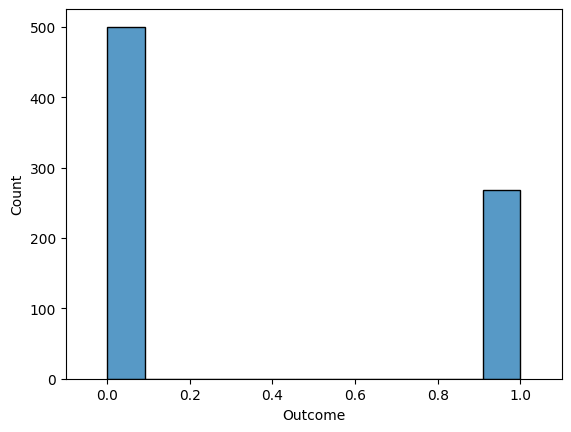

In [6]:
# Variables categóricas
sns.histplot(data = total_data, x = "Outcome").set_xlim(-0.1, 1.1)


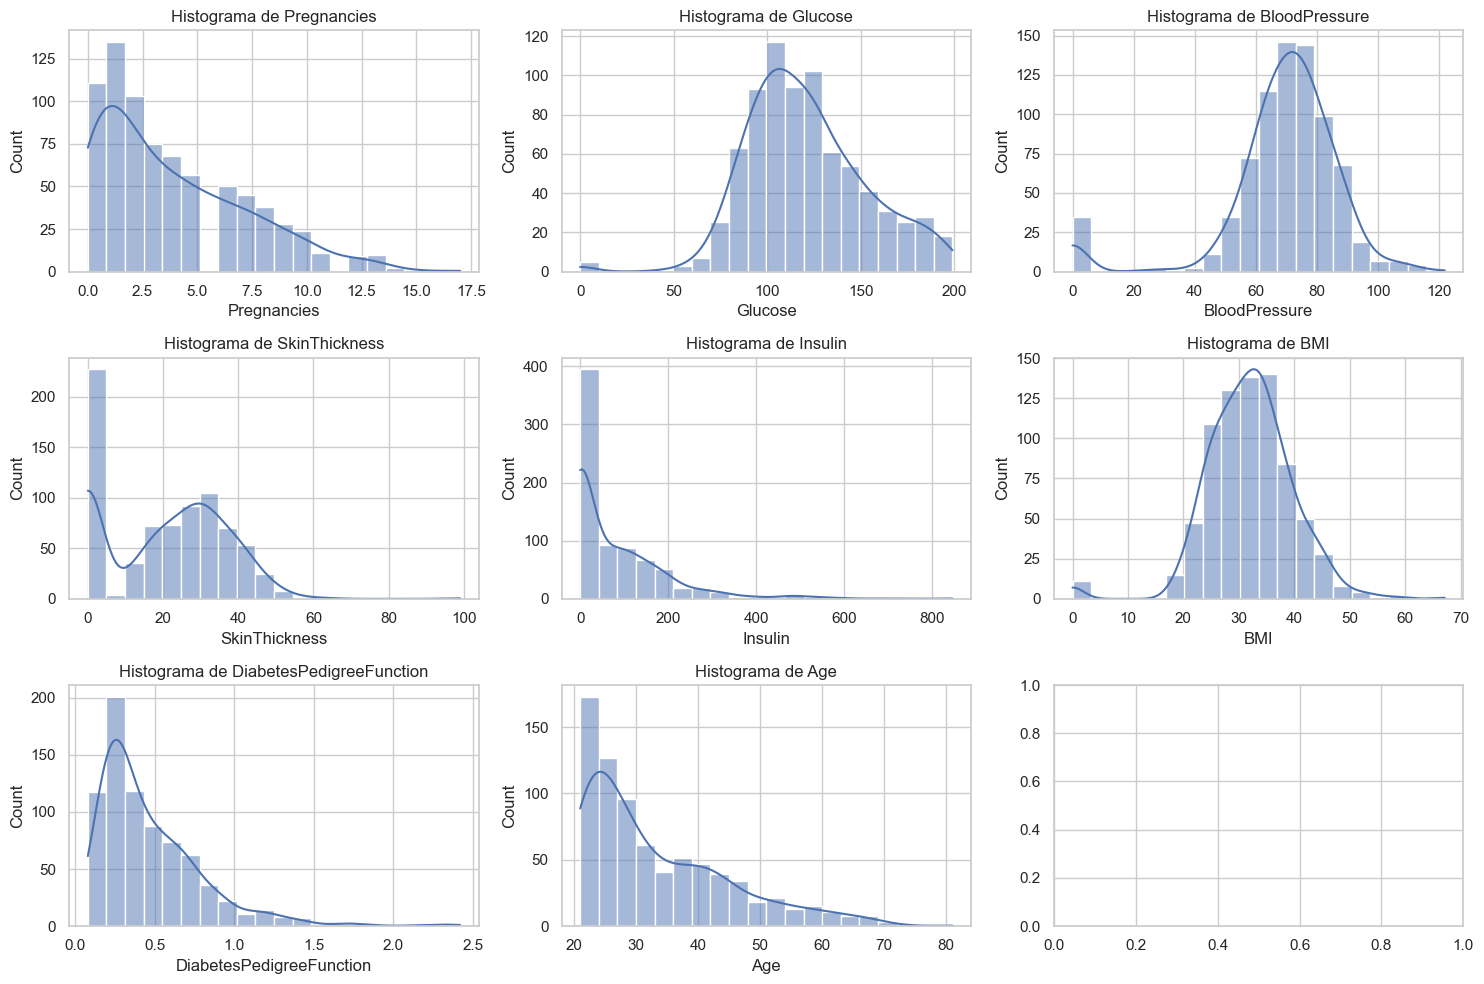

In [7]:
sns.set(style="whitegrid")

# Variables numéricas
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Crear subgráficos de histogramas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, variable in enumerate(numeric_variables):
    sns.histplot(total_data[variable], bins=20, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histograma de {variable}')

plt.tight_layout()
plt.show()


PASO 3: ANÁLISIS MULTIVARIANTE

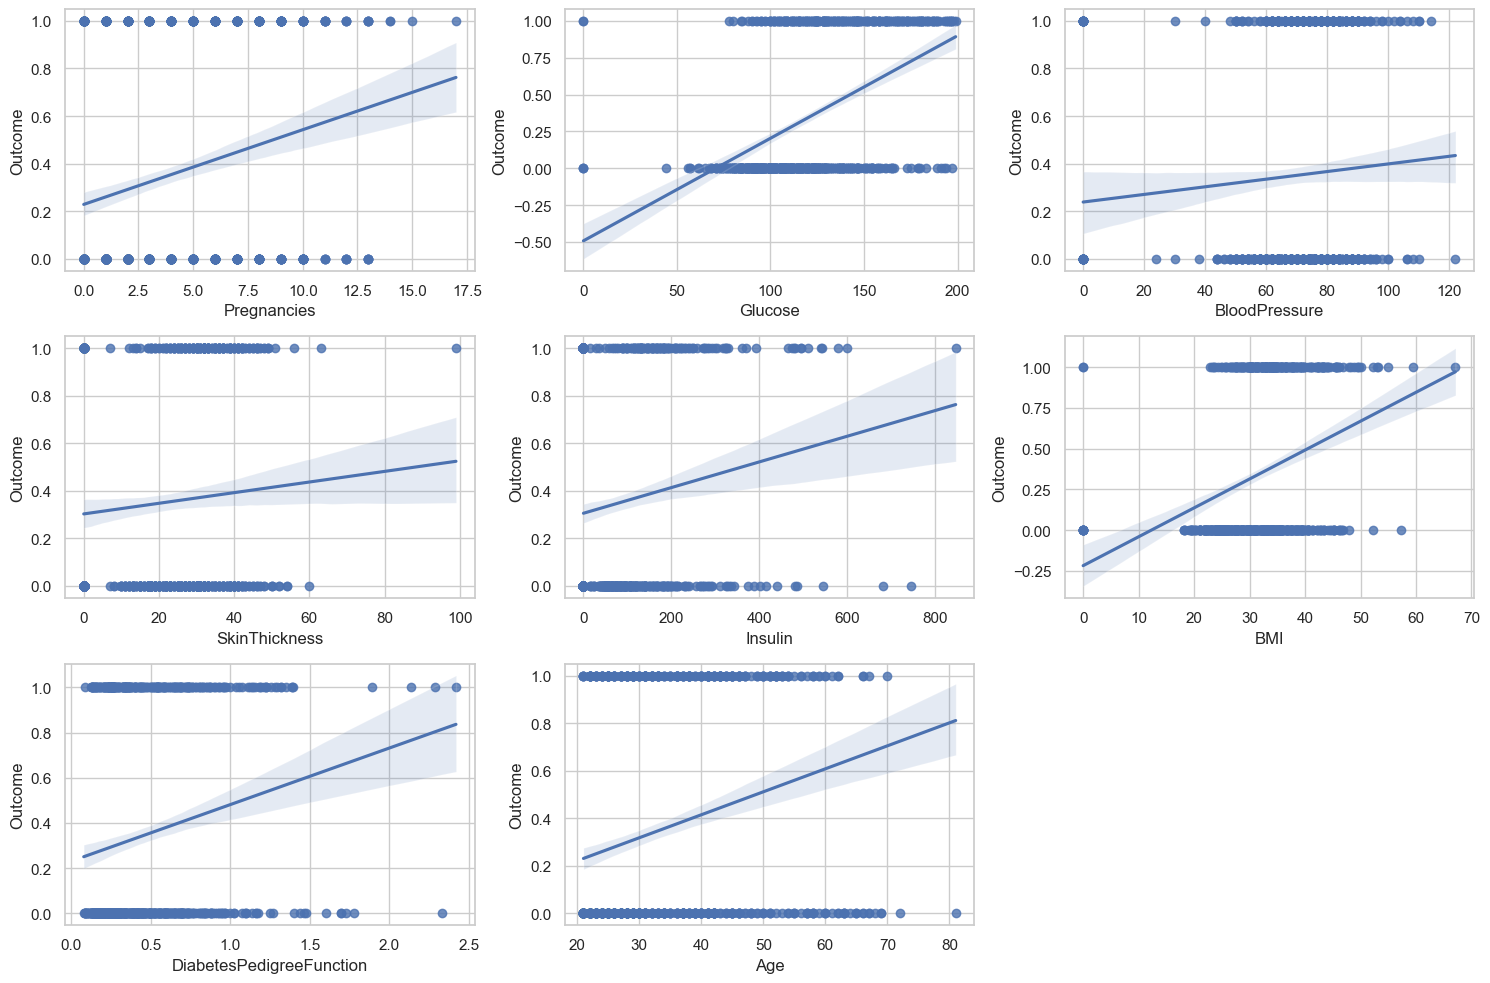

In [9]:
# análisis numérico-numérico
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=variable, y="Outcome", data=total_data)

plt.tight_layout()
plt.show()

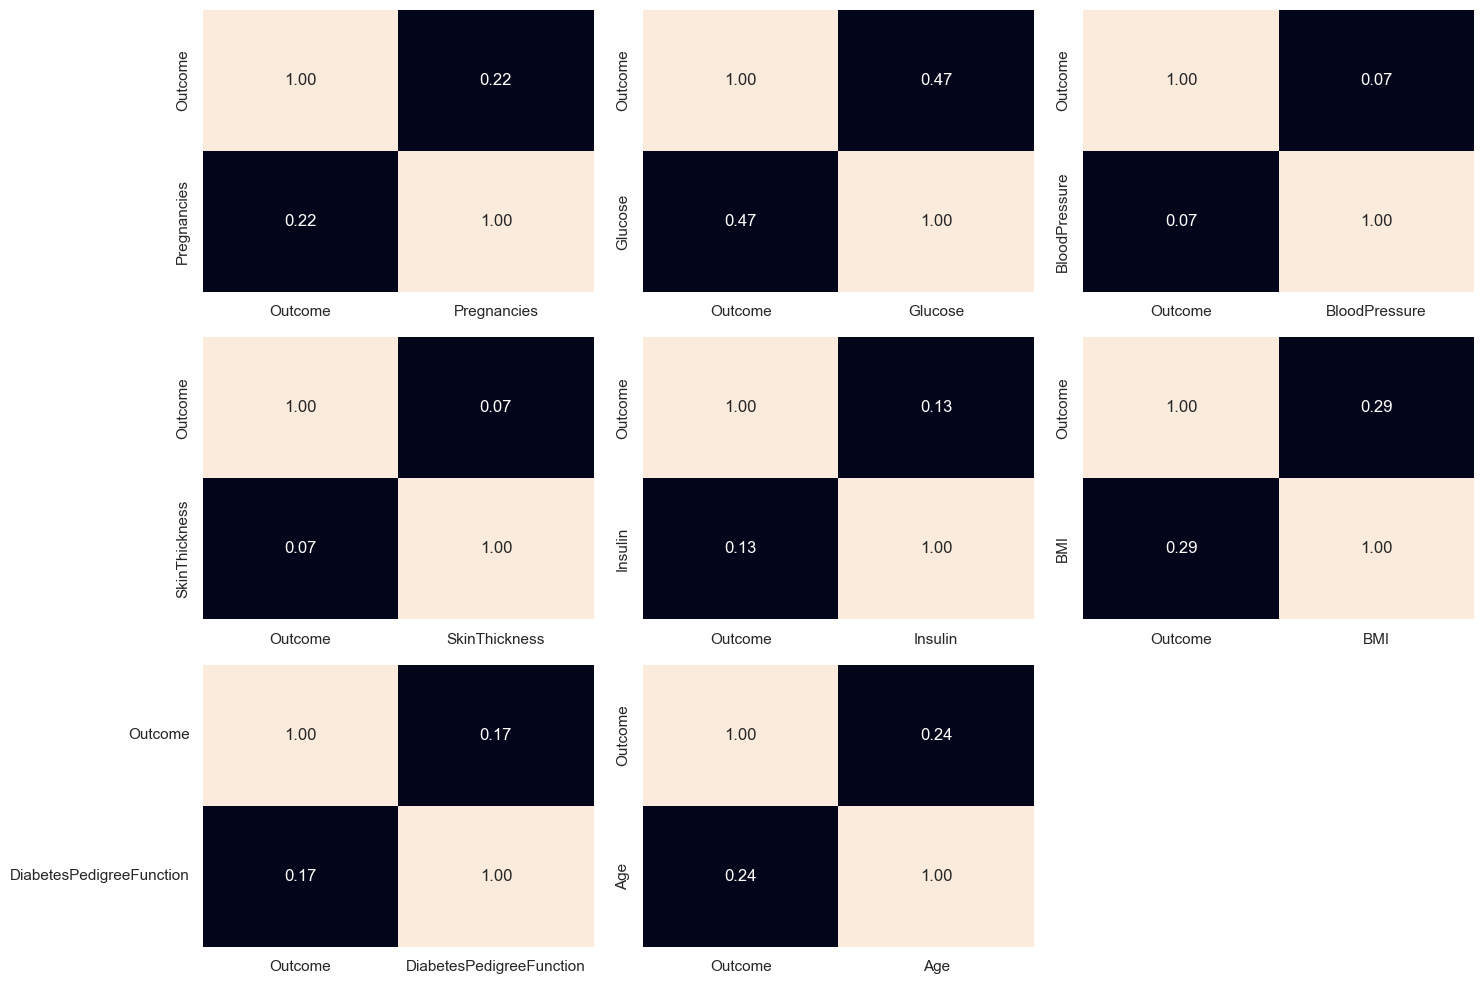

In [10]:
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.heatmap(total_data[["Outcome", variable]].corr(), annot=True, fmt=".2f", cbar=False)

plt.tight_layout()
plt.show()

El análisis numérico numérico muestra lo siguiente:

1. La relación entre las predictoras y la target (Outcome) Es alta en las siguientes:

    Glucosa
    
    BMI (índice de masa corporal)
    
    Edad
    
    Embarazos

2. La relación es baja en las siguientes:

    DiabetesPedigreeFunction

    Presión Sanguínea

    Insulina

    

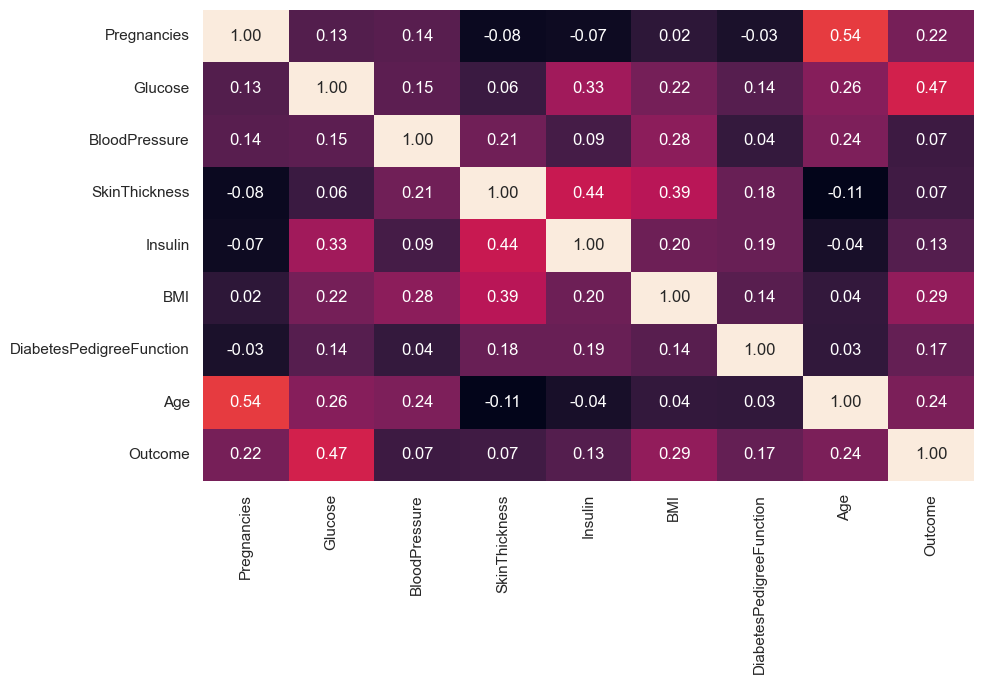

In [11]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(total_data.corr(), annot = True, fmt = ".2f", cbar = False)
plt.tight_layout()
plt.show()

PASO 3.5: DIVISIÓN TRAIN Y TEST.

In [42]:
from sklearn.model_selection import train_test_split

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# We divide the dataset into training and test samples

X = total_data.drop("Outcome", axis = 1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

PASO 4: ANÁLISIS DE OUTLIERS

In [13]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# VALORES NULOS
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No existen valores nulos para eliminar / cambiar

ALGORITMO DECITION TREE

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

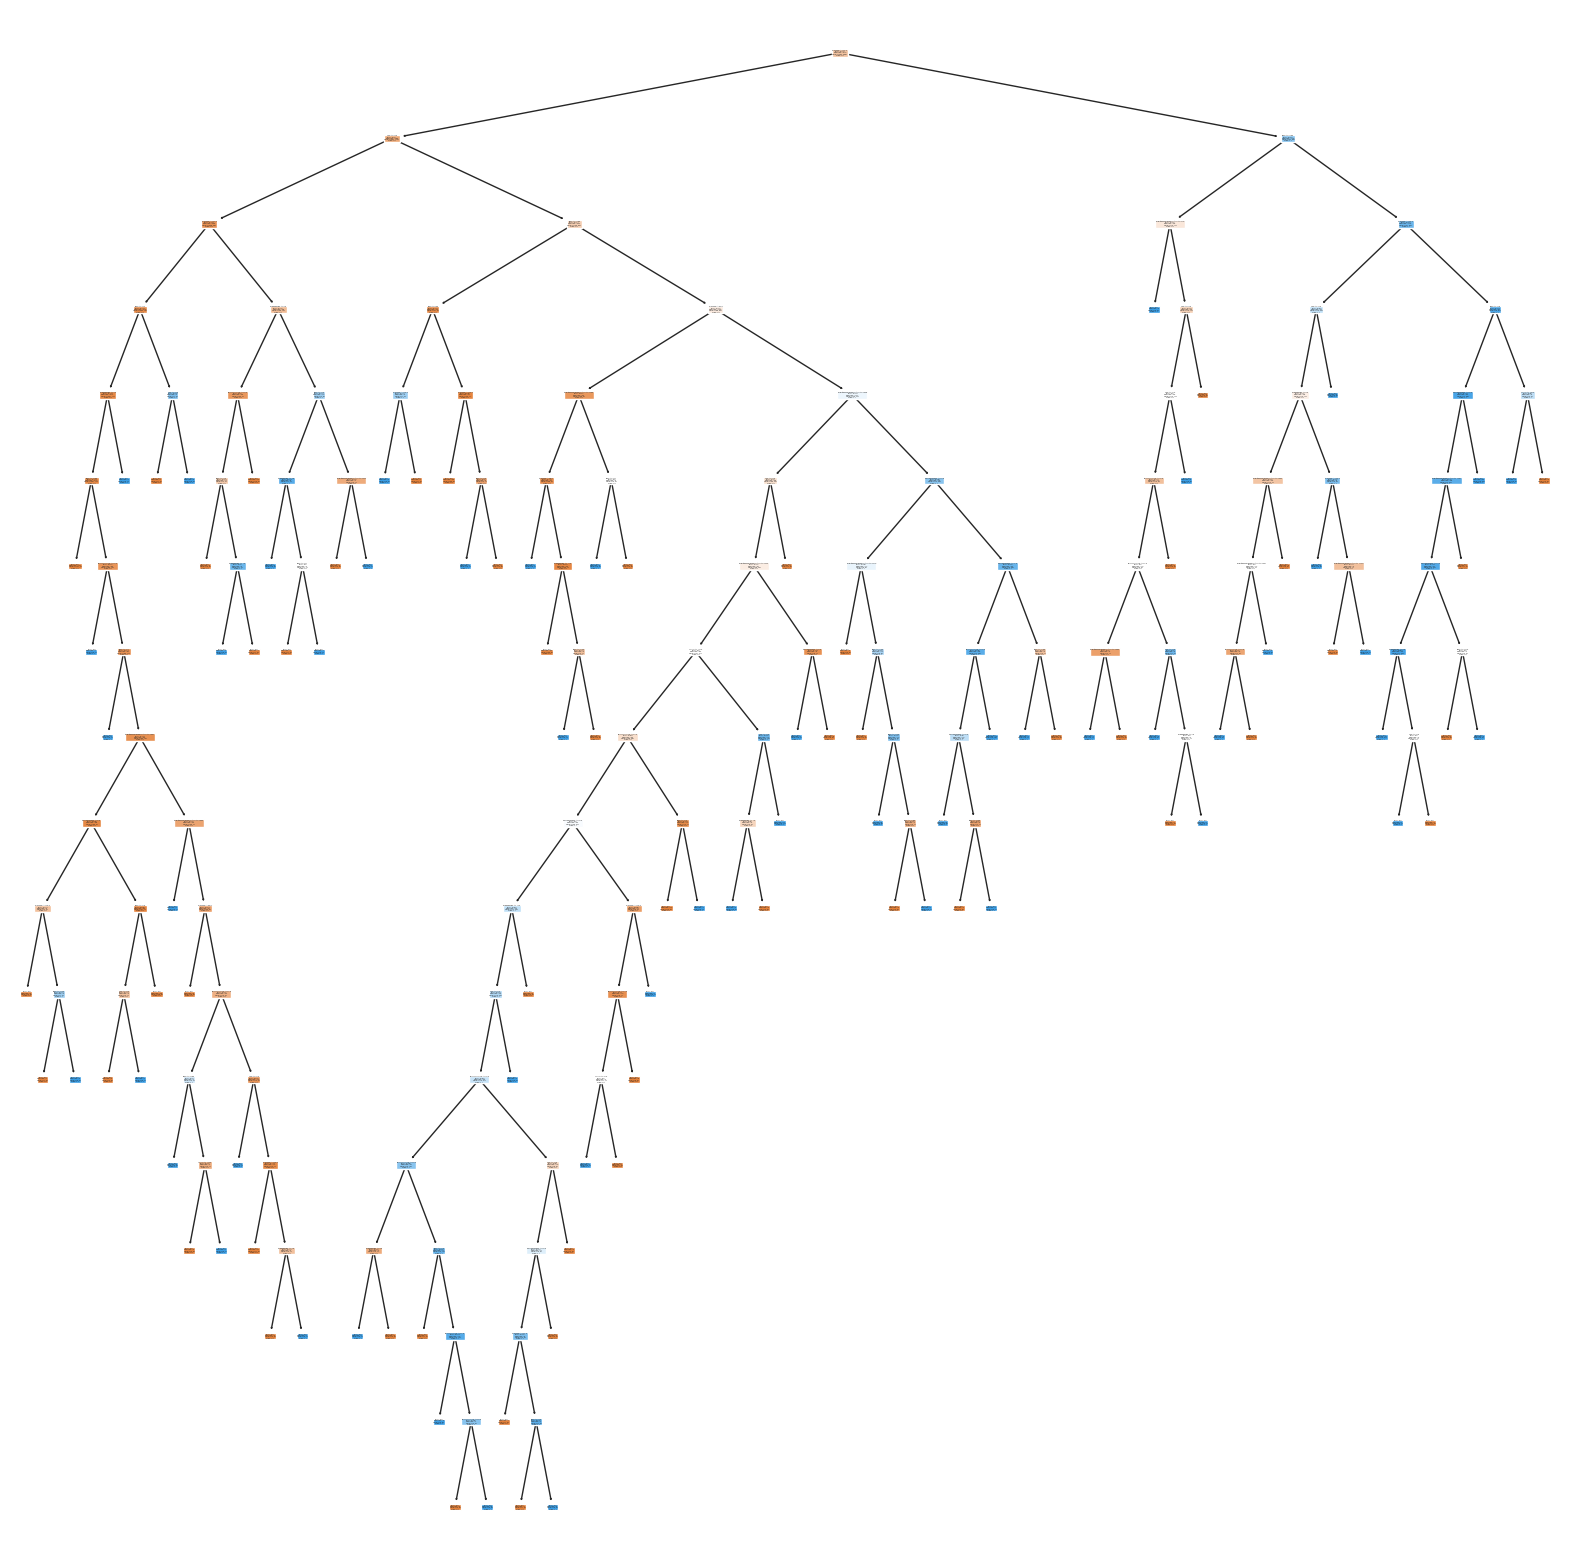

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,20))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6948051948051948

            SELECTKBEST

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separar las características (X) y las etiquetas (y)
X = total_data.drop('Outcome', axis=1)  # Reemplaza 'TargetColumn' con el nombre de tu columna objetivo
y = total_data['Outcome']
# Crear el objeto SelectKBest con la métrica de puntuación (f_classif para clasificación)
k_best_selector = SelectKBest(score_func=f_classif, k='all')
# Aplicar SelectKBest a tus datos
X_new = k_best_selector.fit_transform(X, y)
# Obtener las puntuaciones de características seleccionadas
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best_selector.scores_})
# Mostrar las puntuaciones de características
print(feature_scores.sort_values('Score',ascending=False))

x_new = pd.DataFrame(X_new)


                    Feature       Score
1                   Glucose  213.161752
5                       BMI   71.772072
7                       Age   46.140611
0               Pregnancies   39.670227
6  DiabetesPedigreeFunction   23.871300
4                   Insulin   13.281108
3             SkinThickness    4.304381
2             BloodPressure    3.256950


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

In [41]:
y_train_predic = model.predict(X_train)
accuracy_score(y_train,y_train_predic)


1.0